In [13]:
import matplotlib.pyplot as plt
import numpy as np
from models import TransformerModelLooped
from train import train_without_config, validate_model

n_dims = 10

In [5]:
import torch
## Random seed, trained not locally

models_dir = "../scripts/scripts/models"
def get_model(c_path, l, h):
    
    model = TransformerModelLooped(n_dims=n_dims,
                                     n_positions=101,
                                     n_embd=256,
                                     n_layer=l,
                                     n_head=h,
                                     pred_type="regression").cuda()
    model.load_state_dict(
        torch.load(f"{models_dir}/{c_path}", weights_only=True)["model_state_dict"])
    return model

# L = 1; h = 4
model_b5_l1 = get_model("noisy_linear_regression/model_b5.pt", 1, 4)
model_b5_l1_t10 = get_model("noisy_linear_regression/model_b5_t10.pt", 1, 4)
model_b10_l1 = get_model("noisy_linear_regression/model_b10.pt", 1, 4)
model_b10_l1_t10 = get_model("noisy_linear_regression/model_b10_t10.pt", 1, 4)
model_b20_l1 = get_model("noisy_linear_regression/model_b20.pt", 1, 4)
model_b20_l1_t10 = get_model("noisy_linear_regression/model_b20_t10.pt", 1, 4)

model_b5_l2 = get_model("n_layers/model_b5_L2.pt", 2, 4)
model_b5_l4 = get_model("n_layers/model_b5_L4.pt", 4, 4)

model_b5_l2_t10 = get_model("n_layers/model_b5_t10_L2.pt", 2, 4)
model_b5_l4_t10 = get_model("n_layers/model_b5_t10_L4.pt", 4, 4)

model_b10_l2 = get_model("n_layers/model_b10_L2.pt", 2, 4)
model_b10_l4 = get_model("n_layers/model_b10_L4.pt", 4, 4)

number of parameters: 0.79M
number of parameters: 0.79M
number of parameters: 0.79M
number of parameters: 0.79M
number of parameters: 0.79M
number of parameters: 0.79M
number of parameters: 1.58M
number of parameters: 3.16M
number of parameters: 1.58M
number of parameters: 3.16M
number of parameters: 1.58M
number of parameters: 3.16M


In [68]:
model_b10_l2_t10 = get_model("n_layers/model_b10_t10_L2.pt", 2, 4)
model_b10_l4_t10 = get_model("n_layers/model_b10_t10_L4.pt", 4, 4)

number of parameters: 1.58M
number of parameters: 3.16M


In [6]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    model.eval()
    for i in range(1, 60):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=31, family="gpt2_loop", task_name="noisy_linear_regression")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop

steps_b5_l1, values_b5_l1 = calculate_by_loop(model_b5_l1)
steps_b5_l2, values_b5_l2 = calculate_by_loop(model_b5_l2)
steps_b5_l4, values_b5_l4 = calculate_by_loop(model_b5_l4)

C:\Users\Vadim_K\DataspellProjects\looped_transformer\scripts\nano_gpt.py:79: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  y = torch.nn.functional.scaled_dot_product_attention(


0
0
0


In [9]:
steps_b10_l1, values_b10_l1 = calculate_by_loop(model_b10_l1)
steps_b10_l2, values_b10_l2 = calculate_by_loop(model_b10_l2)
steps_b10_l4, values_b10_l4 = calculate_by_loop(model_b10_l4)

0
0
0


In [24]:
steps_b5_l1_t10, values_b5_l1_t10 = calculate_by_loop(model_b5_l1_t10)
steps_b5_l2_t10, values_b5_l2_t10 = calculate_by_loop(model_b5_l2_t10)
steps_b5_l4_t10, values_b5_l4_t10 = calculate_by_loop(model_b5_l4_t10)

In [25]:
steps_b10_l1_t10, values_b10_l1_t10 = calculate_by_loop(model_b10_l1_t10)

0


NameError: name 'model_b10_l2_t10' is not defined

In [28]:
steps_b10_l2_t10, values_b10_l2_t10 = calculate_by_loop(model_b10_l2_t10)

0


In [69]:
steps_b10_l4_t10, values_b10_l4_t10 = calculate_by_loop(model_b10_l4_t10)

0


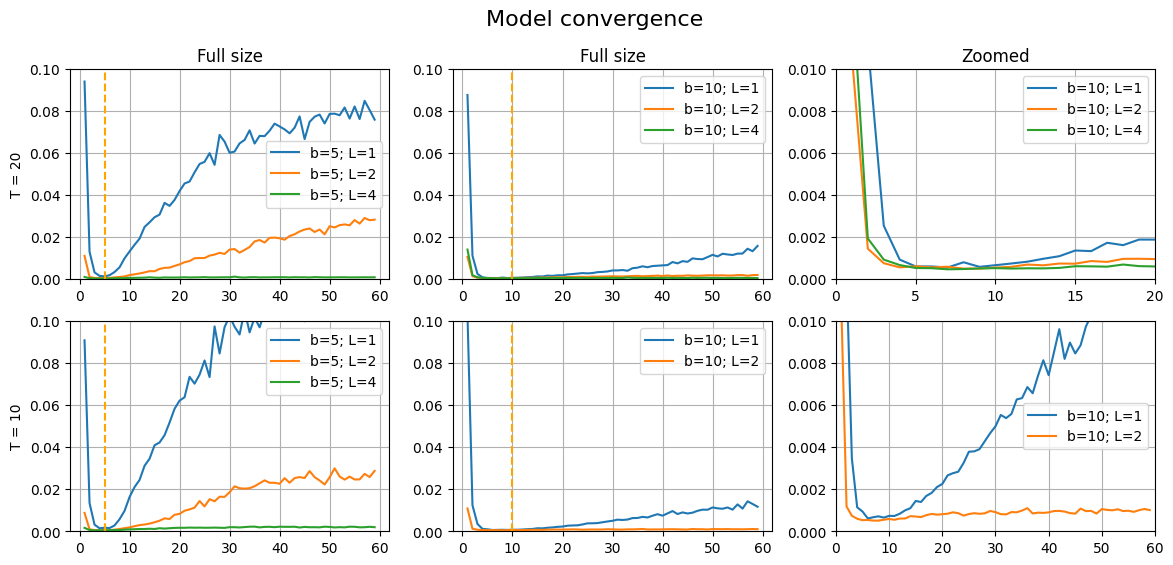

In [67]:
fig, axs = plt.subplots(2, 3, figsize=(14,6))

fig.suptitle('Model convergence', fontsize=16)
#axs.set_title("Standard loop")

axs[0, 0].set_title("Full size")
axs[0, 0].set_ylabel("T = 20")
axs[0, 0].plot(steps_b5_l1, values_b5_l1)
axs[0, 0].plot(steps_b5_l2, values_b5_l2)
axs[0, 0].plot(steps_b5_l4, values_b5_l4)
axs[0, 0].set_ylim([0, 0.1])
axs[0, 0].grid()
axs[0, 0].axvline(x = 5, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[0, 0].legend(["b=5; L=1", "b=5; L=2", "b=5; L=4"])

axs[0, 1].set_title("Full size")
axs[0, 1].plot(steps_b10_l1, values_b10_l1)
axs[0, 1].plot(steps_b10_l2, values_b10_l2)
axs[0, 1].plot(steps_b10_l4, values_b10_l4)
axs[0, 1].set_ylim([0, 0.1])
axs[0, 1].grid()
axs[0, 1].axvline(x = 10, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[0, 1].legend(["b=10; L=1", "b=10; L=2", "b=10; L=4"])

axs[0, 2].set_title("Zoomed")
axs[0, 2].plot(steps_b10_l1, values_b10_l1)
axs[0, 2].plot(steps_b10_l2, values_b10_l2)
axs[0, 2].plot(steps_b10_l4, values_b10_l4)
axs[0, 2].set_ylim([0, 0.01])
axs[0, 2].set_xlim([0, 20])
axs[0, 2].grid()
axs[0, 2].legend(["b=10; L=1", "b=10; L=2", "b=10; L=4"])

axs[1, 0].set_ylabel("T = 10")
axs[1, 0].plot(steps_b5_l1_t10, values_b5_l1_t10)
axs[1, 0].plot(steps_b5_l2_t10, values_b5_l2_t10)
axs[1, 0].plot(steps_b5_l4_t10, values_b5_l4_t10)
axs[1, 0].set_ylim([0, 0.1])
axs[1, 0].grid()
axs[1, 0].axvline(x = 5, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[1, 0].legend(["b=5; L=1", "b=5; L=2", "b=5; L=4"])

axs[1, 1].plot(steps_b10_l1_t10, values_b10_l1_t10)
axs[1, 1].plot(steps_b10_l2_t10, values_b10_l2_t10)
axs[1, 1].plot(steps_b10_l4_t10, values_b10_l4_t10)
axs[1, 1].set_ylim([0, 0.1])
axs[1, 1].grid()
axs[1, 1].axvline(x = 10, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[1, 1].legend(["b=10; L=1", "b=10; L=2", "b=10; L=4"])

axs[1, 2].plot(steps_b10_l1_t10, values_b10_l1_t10)
axs[1, 2].plot(steps_b10_l2_t10, values_b10_l2_t10)
axs[1, 2].plot(steps_b10_l4_t10, values_b10_l4_t10)
axs[1, 2].set_ylim([0, 0.01])
axs[1, 2].set_xlim([0, 60])
axs[1, 2].grid()
axs[1, 2].legend(["b=10; L=1", "b=10; L=2", "b=10; L=4"])

fig.savefig("../images/experiment_looped_n_layers_convergence.png")

28